In [216]:
from pptemp import pptemp

In [217]:
# this is a jupyter command that tells Jupyter how to handle your plot. 
#If you want interactive plots, replace 'inline' by 'notebook'
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

import numpy as np

In [218]:
import larch
from larch import Interpreter, Group
from larch.xafs import autobk, xftf, mback,pre_edge, pre_edge_baseline
from larch.io import read_athena, read_ascii

In [219]:
data = read_ascii("./Co1/data/Co foil 0001-r0002.dat")
data.header

['# Facility: NSLS-II',
 '# Beamline: QAS',
 '# Year: 2022',
 '# Cycle: 2',
 '# SAF: 309337',
 '# PI: Li',
 '# Proposal: 309890',
 '# Scan ID: 25065',
 '# UID: e6708ee3-5f3d-4390-a927-8ea4437c6010',
 '# Comment:',
 '# Start time: 06/09/2022  18:09:40',
 '# Stop time: 06/09/2022  18:10:12',
 '# Total time: 00:31',
 '# Trajectory name: Co-30s-7709.txt',
 '# Element: Cobalt ( 27)',
 '# Edge: K',
 '# E0: 7709',
 '# Reference Foil Element: Co',
 '# Keithley Gains I0: 1E7 V/A It: 1E7 V/A Iref: 1E8 V/A PIPS: 1E8 V/A',
 '# Ion Chamber Gas Flow Rates: I0: 149.80 sccm He + 349.90 sccm N2 + 0.00 sccm Ar',
 '# Ion Chamber Gas Flow Rates: It&Iref: 399.70 sccm N2 + 100.10 sccm Ar',
 '# Incident Beam Path Vertical: -27.48 mm',
 '# Incident Slits Positions B: TOP: 1.0 mm Bottom: -1.0 mm Inboard: -1.5 mm Outboard: 1.5 mm',
 '# Sample Stage Positions: Rotation: 45.0 deg Horizontal: -1.00 mm Vertical: 21.98 mm Beam Direction: 0.00 mm',
 '# PerkinElmer Vertical Position: 500.00 mm',
 '# Front End Mirror H

In [227]:
data = read_ascii("./Co1/data/Co foil 0001.dat")
data.header

['# Facility: NSLS-II',
 '# Beamline: QAS',
 '# Year: 2022',
 '# Cycle: 2',
 '# SAF: 309337',
 '# PI: Li',
 '# Proposal: 309890',
 '# Scan ID: 25064',
 '# UID: c88aa780-7fd5-4179-a350-0436bc01c787',
 '# Comment:',
 '# Start time: 06/09/2022  18:07:24',
 '# Stop time: 06/09/2022  18:07:56',
 '# Total time: 00:31',
 '# Trajectory name: Co-30s-7709.txt',
 '# Element: Cobalt ( 27)',
 '# Edge: K',
 '# E0: 7709',
 '# Reference Foil Element: Co',
 '# Keithley Gains I0: 1E7 V/A It: 1E7 V/A Iref: 1E8 V/A PIPS: 1E8 V/A',
 '# Ion Chamber Gas Flow Rates: I0: 149.80 sccm He + 349.90 sccm N2 + 0.00 sccm Ar',
 '# Ion Chamber Gas Flow Rates: It&Iref: 399.60 sccm N2 + 100.10 sccm Ar',
 '# Incident Beam Path Vertical: -27.48 mm',
 '# Incident Slits Positions B: TOP: 1.0 mm Bottom: -1.0 mm Inboard: -1.5 mm Outboard: 1.5 mm',
 '# Sample Stage Positions: Rotation: 45.0 deg Horizontal: -1.00 mm Vertical: 21.98 mm Beam Direction: 0.00 mm',
 '# PerkinElmer Vertical Position: 500.00 mm',
 '# Front End Mirror H

In [221]:
data.mu_t = -np.log(data.it/data.i0)
data.mu_f = data.iff/data.i0
data.mu_ref = -np.log(data.ir/data.it)

In [222]:
data.mu = data.mu_ref

In [223]:
pre_edge(data)

In [228]:
data

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
i0,ndarray
it,ndarray
ir,ndarray


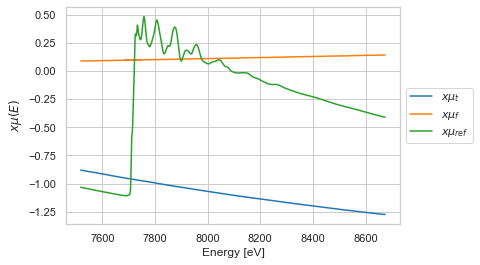

In [189]:
fig, ax = plt.subplots()
ax.plot(data.energy, data.mu_t, label='$x\mu_t$')
ax.plot(data.energy, data.mu_f, label='$x\mu_f$')
ax.plot(data.energy, data.mu_ref, label='$x\mu_{ref}$')
ax.set_xlabel("Energy [eV]")
ax.set_ylabel("$x\mu(E)$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.show()

In [192]:
data

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
i0,ndarray
it,ndarray
ir,ndarray


In [224]:
pre_edge(data, # energy, intensity, and the group to treat
         pre1 = -150, # the lower bond of the function to fit the pre-edge
         pre2 = -30, # the upper bond of the function to fit the pre-edge
         norm1 = 50, # the lower bond of the function to fit the post-edge
         norm2= 2000, # the upper bond of the function to fit the post-edge
         nnorm= 2, # degree for the polynomials
         nvict= 0, # energy exponent to use for pre-edge fit.
         )

In [225]:
data

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
i0,ndarray
it,ndarray
ir,ndarray


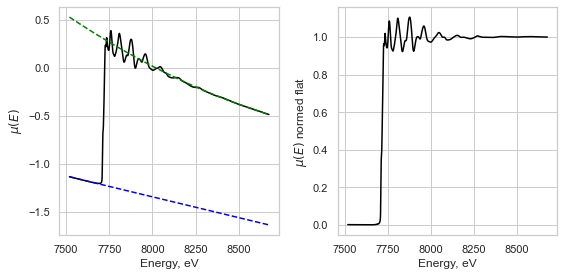

In [226]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(data.energy,data.mu,"k-")
plt.plot(data.energy,data.pre_edge,"b--")
plt.plot(data.energy,data.post_edge,"g--")
plt.xlabel("Energy, eV")
plt.ylabel("$\mu(E)$")

plt.subplot(1,2,2)
plt.plot(data.energy,data.flat,"k-")
plt.xlabel("Energy, eV")
plt.ylabel("$\mu(E)$ normed flat")

plt.tight_layout()

Text(0.5, 0, '$k\\, ({\\rm\\AA})^{-1}$')

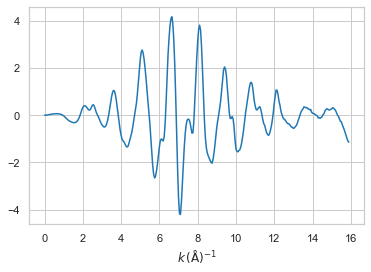

In [211]:
pre_edge_kws=dict(pre1 = -150, pre2 = -30, norm1 = 50, norm2= 2000, nnorm= 2, nvict= 1)

autobk(data.energy, data.mu_ref, data, rbkg=1, kweight=1, pre_edge_kws=pre_edge_kws)
plt.plot(data.k, data.chi*data.k**2)
plt.xlabel(r'$k\, ({\rm\AA})^{-1}$')

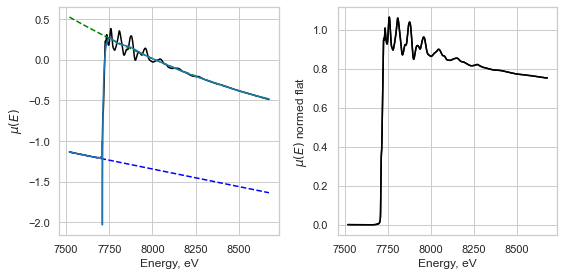

In [213]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(data.energy,data.mu_ref,"k-")
plt.plot(data.energy,data.pre_edge,"b--")
plt.plot(data.energy,data.post_edge,"g--")
plt.plot(data.energy, data.bkg)
plt.xlabel("Energy, eV")
plt.ylabel("$\mu(E)$")

plt.subplot(1,2,2)
plt.plot(data.energy,data.norm,"k-")
plt.plot(data.energy,data.norm_poly,"k-")
plt.xlabel("Energy, eV")
plt.ylabel("$\mu(E)$ normed flat")

plt.tight_layout()

In [122]:
print(data.autobk_details.report)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 72
    # variables        = 11
    chi-square         = 0.04765925
    reduced chi-square = 7.8130e-04
    Akaike info crit   = -505.064819
    Bayesian info crit = -480.021491
[[Variables]]
    coef_00: -1.95943912 +/- 0.03885347 (1.98%) (init = -0.8771967)
    coef_01:  0.03779003 +/- 0.01724777 (45.64%) (init = -0.6110863)
    coef_02:  0.47458170 +/- 0.00757583 (1.60%) (init = 0.4910475)
    coef_03:  0.27506307 +/- 0.00324791 (1.18%) (init = 0.3090075)
    coef_04:  0.27986838 +/- 0.00233492 (0.83%) (init = 0.3179993)
    coef_05:  0.14545563 +/- 0.00182425 (1.25%) (init = 0.2058942)
    coef_06:  0.05886950 +/- 0.00149295 (2.54%) (init = 0.06640766)
    coef_07: -0.07036221 +/- 0.00125753 (1.79%) (init = -0.06495722)
    coef_08: -0.20807483 +/- 0.00175794 (0.84%) (init = -0.2191694)
    coef_09: -0.34337705 +/- 0.00208656 (0.61%) (init = -0.3364561)
    coef_10: -0.40498314 +

In [142]:
data.pre_edge_details.norm2

966.2453750000004

In [141]:
data

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
i0,ndarray
it,ndarray
ir,ndarray


In [165]:
ref = Group()

In [181]:
data

Attribute,Type
path,str
filename,str
header,list
data,ndarray
array_labels,list
attrs,Group
energy,ndarray
i0,ndarray
it,ndarray
ir,ndarray


Text(0.5, 0, '$k\\, ({\\rm\\AA})^{-1}$')

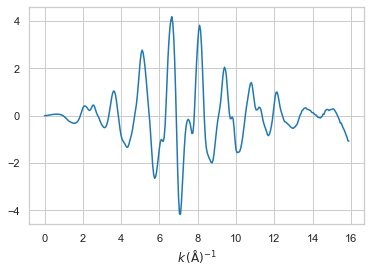

In [167]:
autobk(data.energy, data.mu_ref, ref, rbkg=1, kweight=1, pre_edge_kws=pre_edge_kws)
plt.plot(data.k, data.chi*data.k**2)
plt.xlabel(r'$k\, ({\rm\AA})^{-1}$')

In [168]:
ref

Attribute,Type
journal,Journal
e0,float64
norm,ndarray
norm_poly,ndarray
flat,ndarray
dmude,ndarray
d2mude,ndarray
edge_step,float
edge_step_poly,float
pre_edge,ndarray


In [ ]:
autobk